<a href="https://colab.research.google.com/github/Shreeyamshu/Ai/blob/main/Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Worksheet 4 – Implementation and Experimentation with kNN

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_.csv to diabetes_.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

## Problem 1: Load Dataset & EDA

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Feature Matrix & Target

In [8]:
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

## Train-Test Split (From Scratch)

In [9]:

def train_test_split_scratch(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    split = int(len(X) * test_size)
    return X[idx[split:]], X[idx[:split]], y[idx[split:]], y[idx[:split]]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)


## Euclidean Distance

In [10]:

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))


## kNN Implementation

In [11]:

def knn_predict_single(query, X_train, y_train, k):
    distances = [euclidean_distance(query, x) for x in X_train]
    k_idx = np.argsort(distances)[:k]
    return np.bincount(y_train[k_idx]).argmax()

def knn_predict(X_test, X_train, y_train, k):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])


## Accuracy

In [12]:

def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100


### KNN Result (Original Data)

In [14]:

pred_orig = knn_predict(X_test, X_train, y_train, k=3)
acc_orig = compute_accuracy(y_test, pred_orig)
acc_orig


np.float64(67.3913043478261)

## Problem 2: Feature Scaling

In [15]:

def standard_scaler(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

X_scaled = standard_scaler(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)


In [16]:

pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
acc_scaled = compute_accuracy(y_test_s, pred_scaled)
acc_scaled


np.float64(70.86956521739131)

## Problem 3: Experiment with k (1–15)

In [17]:

k_values = range(1, 16)
acc_o, acc_s, time_o, time_s = [], [], [], []

for k in k_values:
    start = time.time()
    acc_o.append(compute_accuracy(y_test, knn_predict(X_test, X_train, y_train, k)))
    time_o.append(time.time() - start)

    start = time.time()
    acc_s.append(compute_accuracy(y_test_s, knn_predict(X_test_s, X_train_s, y_train_s, k)))
    time_s.append(time.time() - start)


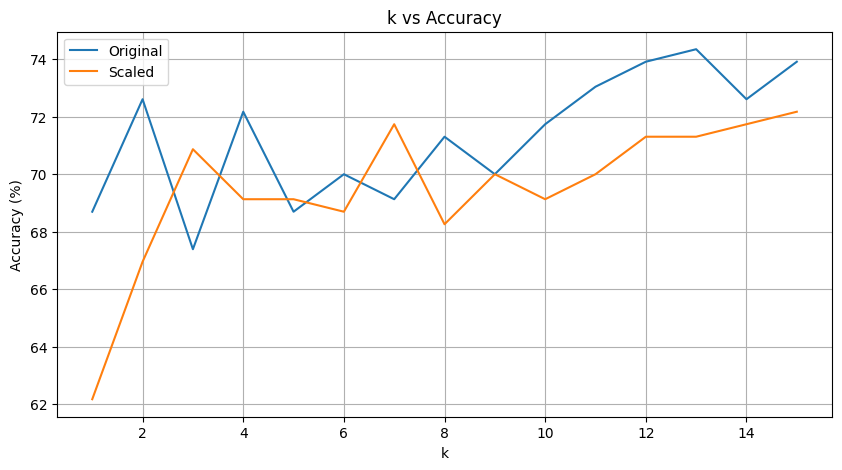

In [18]:

plt.figure(figsize=(10,5))
plt.plot(k_values, acc_o, label='Original')
plt.plot(k_values, acc_s, label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.title('k vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()


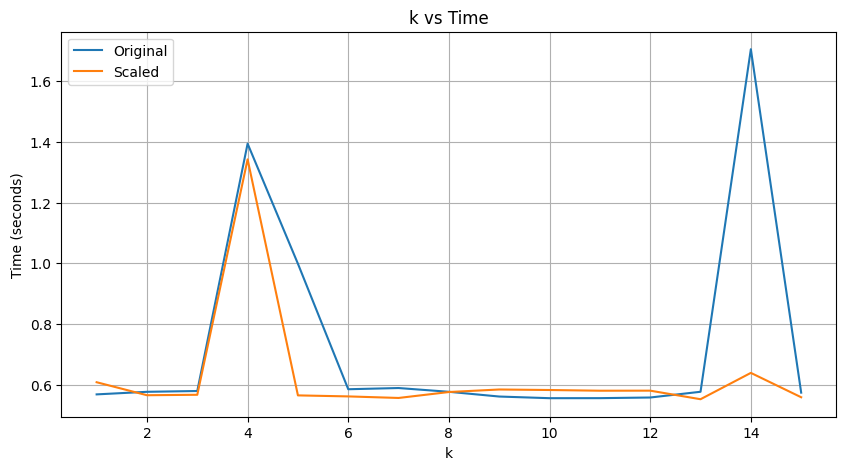

In [19]:

plt.figure(figsize=(10,5))
plt.plot(k_values, time_o, label='Original')
plt.plot(k_values, time_s, label='Scaled')
plt.xlabel('k')
plt.ylabel('Time (seconds)')
plt.title('k vs Time')
plt.legend()
plt.grid(True)
plt.show()


## Problem 4: Discussion

- KNN is computationally expensive for large datasets.
- Scaling improves distance-based performance.
- Larger k reduces variance but increases bias.
- Efficiency can be improved using KD-Trees, PCA, or Approximate Nearest Neighbors.